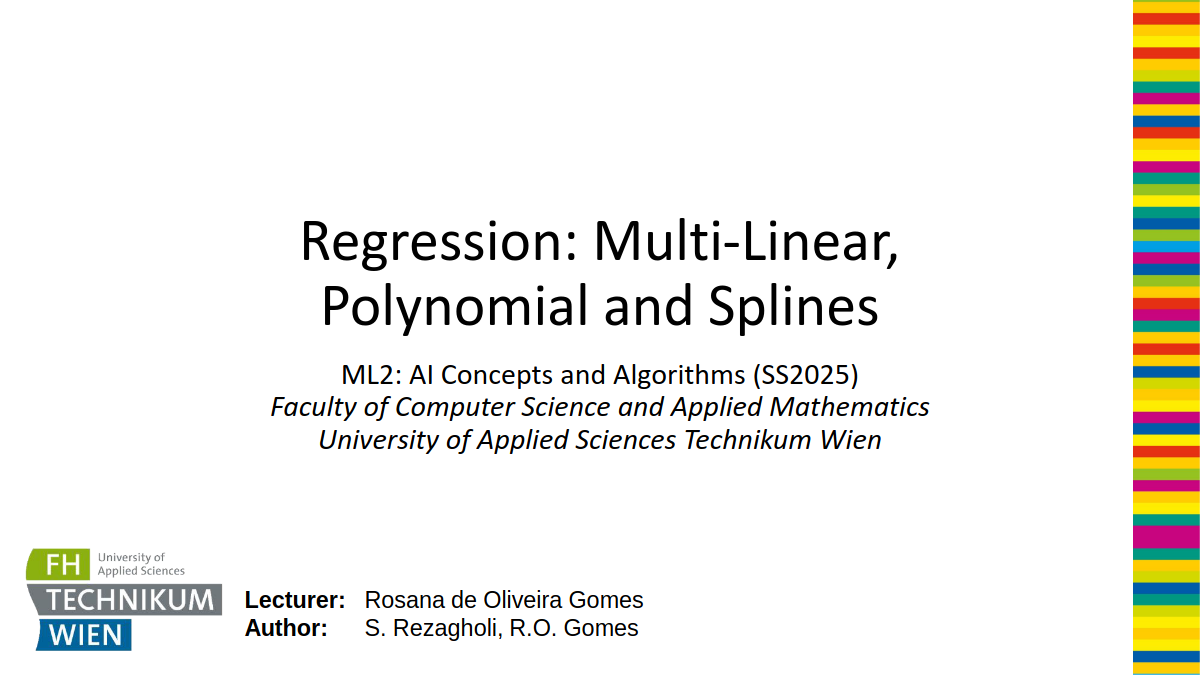


---

🎓 **Welcome to today's session**
**Topic**: **Regression: Multi-Linear, Polynomial, and Splines**
**Course**: ML2 – *AI Concepts and Algorithms (SS2025)*
**Institution**: University of Applied Sciences Technikum Wien
**Lecturer**: Rosana de Oliveira Gomes
**Authors**: S. Rezagholi, R.O. Gomes

---

### 🧠 What’s This Lecture About?

We’re diving into three major regression techniques used in data modeling:

---

#### 1. **Multi-Linear Regression (MLR)**

* A **linear** model where we predict a target variable using **multiple independent variables**.
* It fits a **hyperplane** (not just a line!) in multidimensional space.
* Useful when you have several features influencing an outcome (e.g., price of a house depending on area, location, number of rooms, etc.).

#### 2. **Polynomial Regression**

* A non-linear extension of linear regression.
* Still based on linear modeling techniques, but it adds **powers of the independent variable(s)**.
* Fits curves, not straight lines — e.g., U-shapes, S-shapes, etc.
* Good when data shows **non-linear trends** but you still want a smooth global function.

#### 3. **Splines**

* Piecewise polynomial functions.
* Instead of fitting one big polynomial, splines **divide the input space into intervals** and fit **simple polynomials** (usually low-degree) to each.
* The beauty? It avoids the “overfitting wiggle” of high-degree polynomials.
* Super powerful for **local flexibility** with **global smoothness**.

---

### 📚 Why Are We Learning This?

These techniques form the **foundation of supervised learning** for regression tasks. They’re:

* Simple to implement.
* Transparent and interpretable.
* Still highly competitive when used with proper regularization or basis transformations.
* A **gateway to more complex models** (e.g., kernel methods, Gaussian processes, neural nets).

---


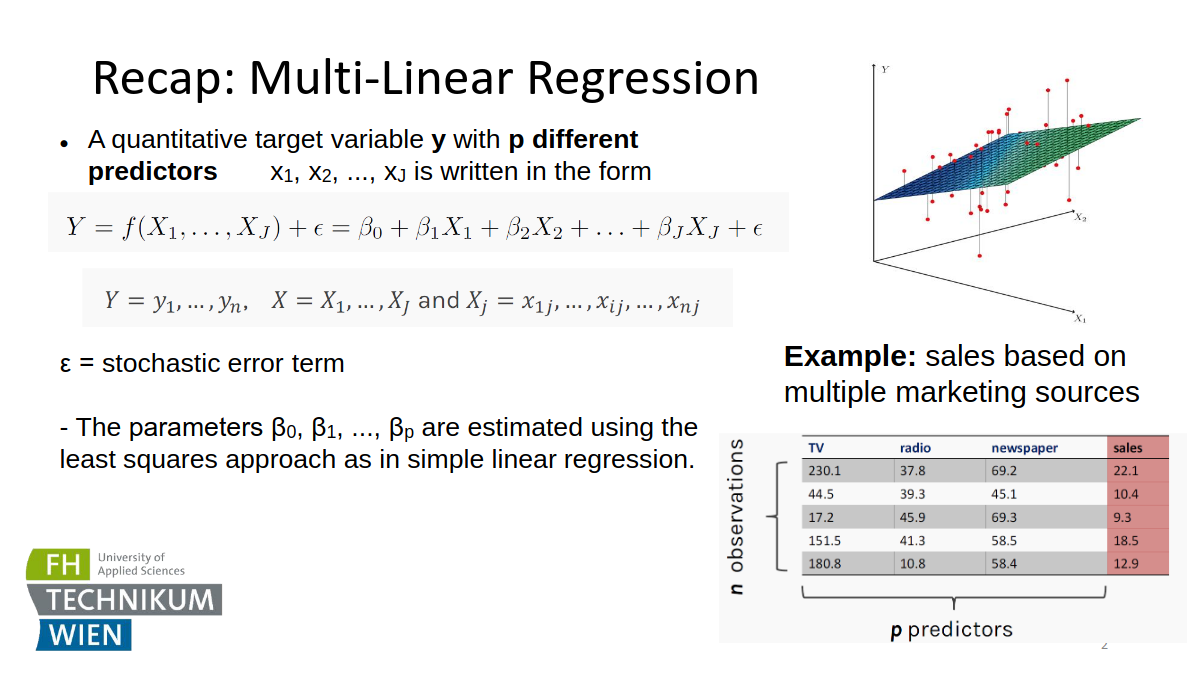


---

### 🎯 **Title: Recap — Multi-Linear Regression**

---

## 🧪 What is Multi-Linear Regression?

We’re modeling a **quantitative** (i.e. numeric) target variable `Y` using **multiple predictor variables**:
    `X₁, X₂, ..., Xⱼ`

So instead of just drawing a **line** (like in simple linear regression), we are now fitting a **hyperplane** in J-dimensional space.

---

### 🧾 The Formula (centered at the top):

$$
Y = f(X_1, \ldots, X_J) + \epsilon = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_J X_J + \epsilon
$$

* `β₀` is the **intercept** (value of Y when all X’s are 0).
* `β₁, ..., βⱼ` are the **coefficients** (slopes) — how much `Y` changes when `Xⱼ` changes.
* `ε` is the **error term**, capturing everything we couldn’t model — randomness, noise, hidden variables, etc.

---

### 🧮 Matrix Form (2nd box):

$$
Y = (y_1, ..., y_n), \quad X = (X_1, ..., X_J), \quad \text{and} \quad X_j = (x_{1j}, ..., x_{nj})
$$

* You have `n` observations (rows in the data).
* Each row has values for `J` predictors.
* We can represent the whole dataset as a **matrix X** of shape `(n × J)`.

---

### 🛠 Estimation:

We use **least squares** to fit the model:

* We choose the `β` values that **minimize the sum of squared errors** (residuals).
* This means we’re finding the “best” plane that fits the cloud of data points.

---

### 📊 Real-Life Example (bottom right):

**Sales prediction based on multiple marketing channels**

* Inputs: TV ads, Radio ads, Newspaper ads
* Output: Sales

Example data:

| TV    | Radio | Newspaper | Sales |
| ----- | ----- | --------- | ----- |
| 230.1 | 37.8  | 69.2      | 22.1  |
| 44.5  | 39.3  | 45.1      | 10.4  |
| ...   | ...   | ...       | ...   |

So we fit:

$$
\text{Sales} = \beta_0 + \beta_1 \cdot \text{TV} + \beta_2 \cdot \text{Radio} + \beta_3 \cdot \text{Newspaper} + \epsilon
$$

---

### 🧩 Visualization (top-right):

That 3D plot is:

* X-axis = `X₁` (e.g. TV)
* Y-axis = `X₂` (e.g. Radio)
* Z-axis = `Y` (e.g. Sales)

And the **plane** shows the multi-linear regression model. Red dots = real data points. Some fall above/below the plane = model error.

---

### 🧠 Summary Takeaway:

> Multi-Linear Regression finds the best-fit hyperplane that predicts `Y` using multiple `X`s, minimizing the squared errors between real and predicted values.

---


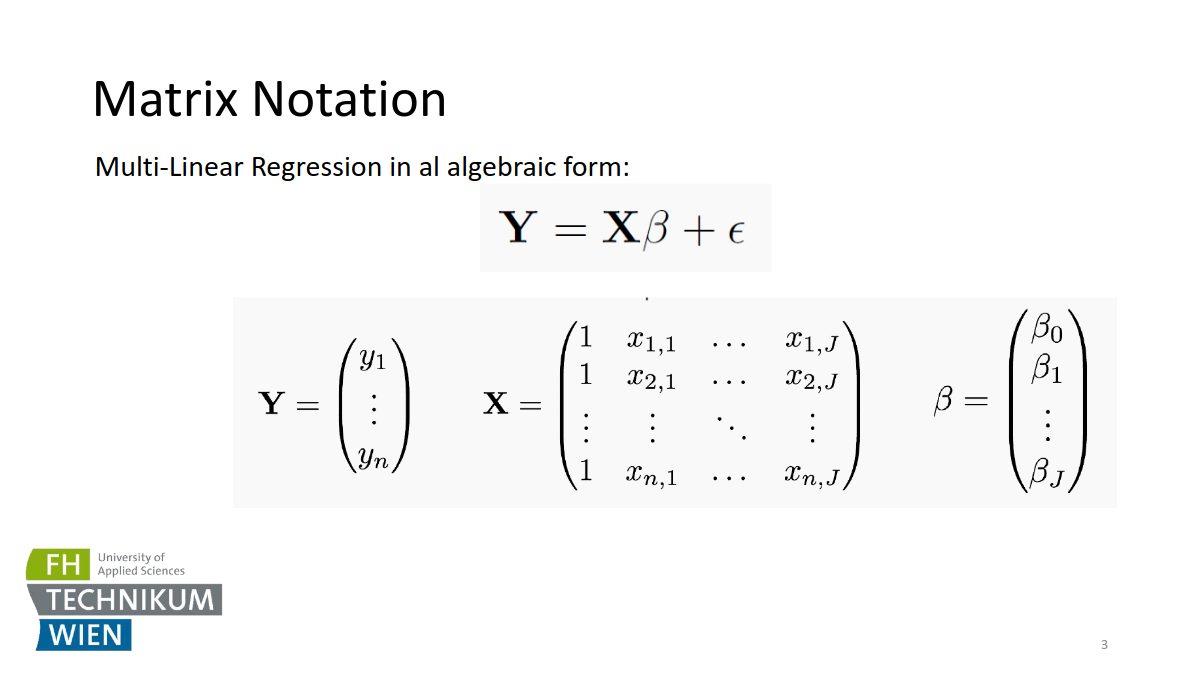


---

## 🎓 Slide Title: **Matrix Notation**

This slide shows how we write the **entire regression model using linear algebra** — this is crucial for computational efficiency and theoretical understanding.

---

### 📐 General Form:

$$
\mathbf{Y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

Let’s break down each component in detail.

---

### 🧩 1. **Vector $\mathbf{Y}$**

$$
\mathbf{Y} = \begin{pmatrix}
y_1 \\
\vdots \\
y_n
\end{pmatrix}
$$

This is the **target vector** of length $n$ (number of data points).
Each $y_i$ is a **real observed value** — e.g. actual sales.

---

### 🏗 2. **Design Matrix $\mathbf{X}$**

$$
\mathbf{X} =
\begin{pmatrix}
1 & x_{1,1} & \cdots & x_{1,J} \\
1 & x_{2,1} & \cdots & x_{2,J} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{n,1} & \cdots & x_{n,J}
\end{pmatrix}
$$

This is your **data matrix**:

* Size: $n \times (J+1)$
* Each **row** is a data sample (observation).
* Each **column** is a feature.
* The first column is full of 1s to represent the **intercept** (β₀).

✅ This is why we sometimes say the regression model is linear in the parameters: we're just doing **matrix multiplication**.

---

### 🧮 3. **Coefficient Vector $\boldsymbol{\beta}$**

$$
\boldsymbol{\beta} =
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_J
\end{pmatrix}
$$

This is the vector of weights — one for each predictor variable, **plus the intercept**.

---

### 🎲 4. **Error Vector $\boldsymbol{\epsilon}$**

This isn’t shown in matrix form here, but it’s:

$$
\boldsymbol{\epsilon} = \begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{pmatrix}
$$

It's the **difference between real values and predicted ones** — the “noise” or model mismatch.

---

### 🧠 Why Matrix Notation?

Because with it, you can compute the least squares solution **efficiently**:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
$$

This formula gives you the best β values minimizing the sum of squared errors.

---

### 💬 Summary

> “All of Multi-Linear Regression boils down to multiplying a matrix of inputs with a vector of weights — plus an error term.”

This notation allows us to generalize, compute, and optimize models very efficiently — especially with many features.

---


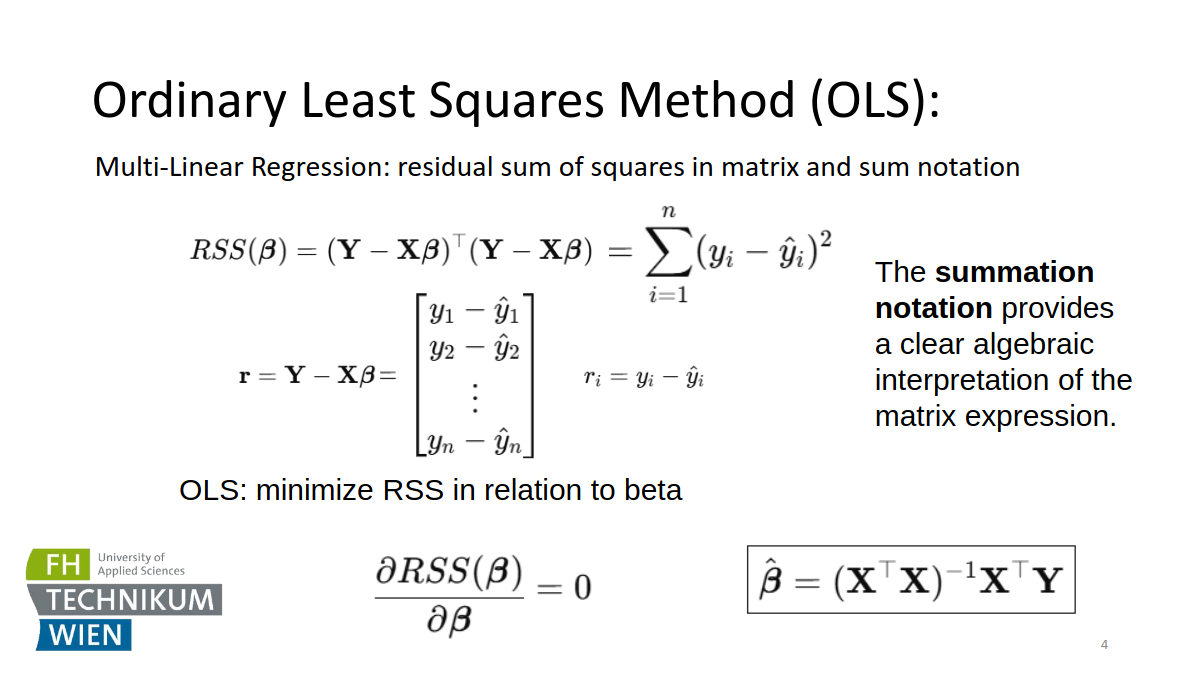


---

## 🧠 **Slide: Ordinary Least Squares Method (OLS)**

OLS is the **most common method** to estimate the coefficients (β’s) in linear regression.

---

### 🔍 What’s the Goal?

To find the **best vector of weights $\boldsymbol{\beta}$** that minimizes the **error** between the true values and the predicted values.

This error is measured by:

$$
\textbf{RSS}(\beta) = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

We want to **minimize this Residual Sum of Squares (RSS)**.

---

### 📐 Matrix Notation (Top Left):

$$
RSS(\beta) = (\mathbf{Y} - \mathbf{X}\boldsymbol{\beta})^\top (\mathbf{Y} - \mathbf{X}\boldsymbol{\beta})
$$

This is a **quadratic form** representing the total squared error:

* $\mathbf{Y}$ is the vector of true values.
* $\mathbf{X}\boldsymbol{\beta} = \hat{\mathbf{Y}}$ is the vector of predicted values.
* $\mathbf{Y} - \hat{\mathbf{Y}} = \mathbf{r}$ is the vector of residuals.

---

### 🧮 Vector of Residuals (Middle):

$$
\mathbf{r} = \mathbf{Y} - \mathbf{X} \boldsymbol{\beta}
$$

Or, explicitly:

$$
\mathbf{r} =
\begin{pmatrix}
y_1 - \hat{y}_1 \\
y_2 - \hat{y}_2 \\
\vdots \\
y_n - \hat{y}_n
\end{pmatrix}
$$

Each residual $r_i = y_i - \hat{y}_i$ is the **gap** between what the model predicted and the real value.

---

### ➕ Summation Notation (Top Right):

$$
RSS(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Same idea, just notated as a sum — this is **easier to understand algebraically**, while the matrix form is more useful for **computations**.

---

### 🧰 Optimization (Bottom Left):

To find the best $\beta$, we take the derivative of RSS and set it to zero:

$$
\frac{\partial RSS(\beta)}{\partial \beta} = 0
$$

This gives us the value of $\beta$ that minimizes the squared error — a classic **least squares optimization**.

---

### ✅ Closed-Form Solution (Bottom Right):

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
$$

This is **the golden formula** of OLS.

* $\mathbf{X}^\top \mathbf{X}$: captures how the features relate to each other.
* $\mathbf{X}^\top \mathbf{Y}$: captures how the features relate to the target.
* The inverse part rescales the result to get the exact $\beta$ values that minimize the error.

This is only valid when $\mathbf{X}^\top \mathbf{X}$ is **invertible** — i.e., the features are not collinear (linearly dependent).

---

### 💬 Summary:

> Ordinary Least Squares solves the regression problem by minimizing the squared differences between predictions and actual values. It gives a **closed-form solution** for the best-fit weights using **linear algebra**.

---


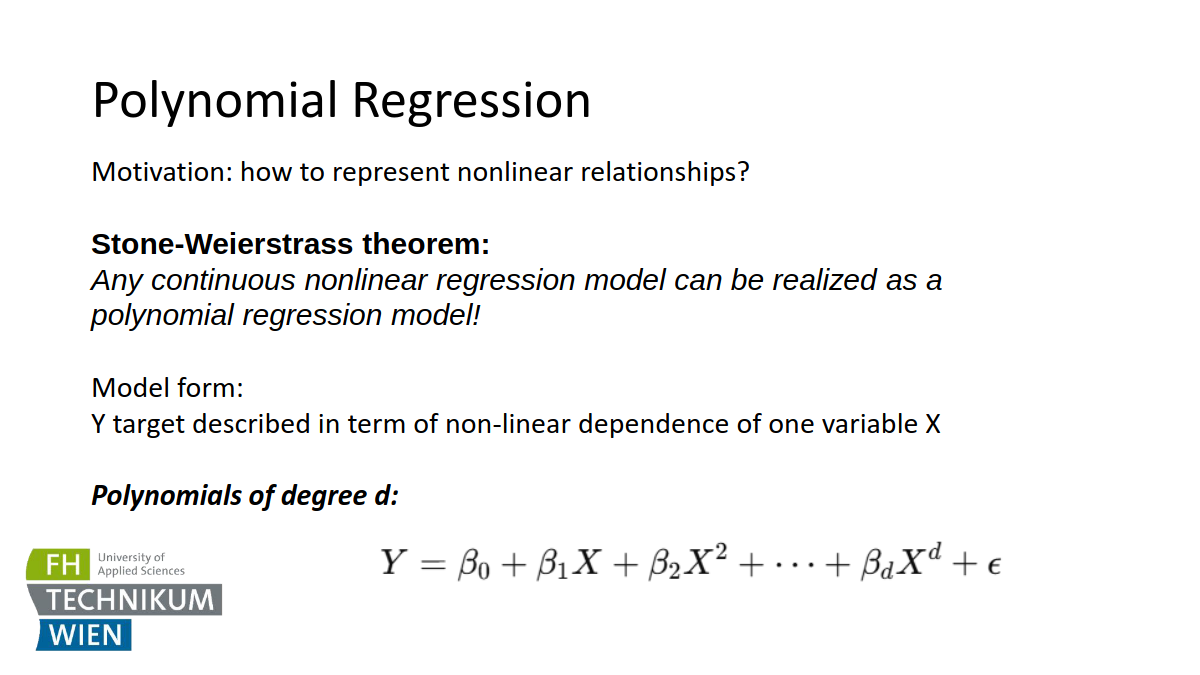


---

## 🧠 **Slide: Polynomial Regression**

---

### ❓ Motivation: Why Polynomial Regression?

Not all real-world relationships are straight lines.

* For example, performance might **improve**, then **level off**, or even **drop**.
* A straight line can’t model this — but a **curve** can.

Polynomial regression gives us this ability while staying in the family of **linear models in the parameters**.

---

### 🧮 Theoretical Foundation: **Stone-Weierstrass Theorem**

> “Any continuous nonlinear regression model can be approximated arbitrarily well by a polynomial.”

In simple terms:

* If you give me enough polynomial terms (e.g., $X^2, X^3, ..., X^d$), I can **mimic any smooth function**.
* So even if the true relationship is a weird curve, a polynomial can approximate it.

💡 This is the **mathematical justification** for using polynomials to model non-linearity!

---

### 📐 The Model:

We assume:

$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \ldots + \beta_d X^d + \epsilon
$$

Where:

* $Y$ is the output (target variable).
* $X$ is the single input feature.
* $X^2, X^3, ..., X^d$ are **higher-order transformations** of the same variable.
* $\beta_0, ..., \beta_d$ are learned via **ordinary least squares**, just like before.
* $\epsilon$ is the error term.

---

### 📏 Degree $d$: How Flexible is the Curve?

* $d = 1$: simple linear regression (a line)
* $d = 2$: a parabola
* $d = 3$: cubic curve
* $d = 10$: a highly wiggly curve (beware overfitting!)

More degrees = more flexibility, but also more danger of **fitting the noise** in the data.

---

### 💬 Summary

> Polynomial regression gives us a way to model non-linear behavior while keeping the model **linear in the parameters** — meaning we can still solve it with linear algebra.

It’s a **sweet spot** between simplicity and flexibility.

---


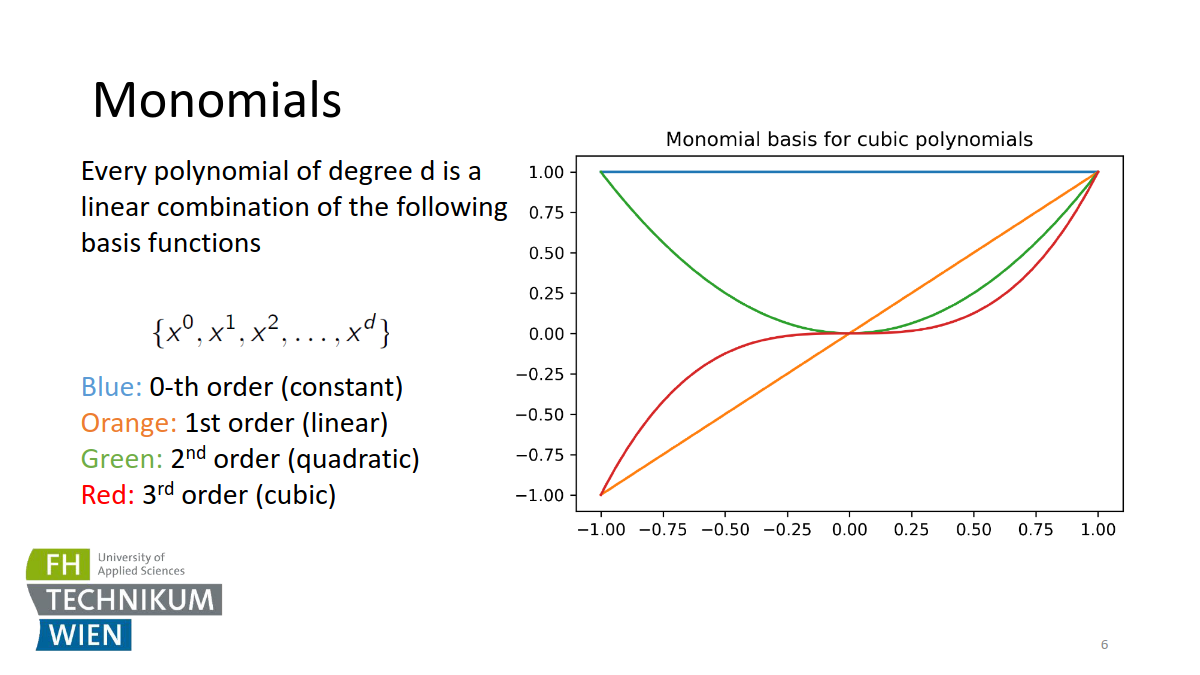


---

## 🧠 **Slide: Monomials**

---

### 🔧 What are Monomials?

Monomials are **individual powers of a variable**.
For example:

$$
x^0,\ x^1,\ x^2,\ \ldots,\ x^d
$$

These are the **basis functions** for polynomial regression.

---

### 🧮 Why Important?

Because **every polynomial of degree $d$** is just a **linear combination** of these powers.

In other words:

$$
Y = \beta_0 x^0 + \beta_1 x^1 + \beta_2 x^2 + \ldots + \beta_d x^d + \epsilon
$$

This is like building a house:

* 🧱 The monomials are the bricks.
* 🧱 The $\beta$’s are the weights (how many bricks of each type).
* 🏠 The polynomial is the final shape you build.

---

### 📊 The Plot (Right Side):

This shows the **monomial basis functions for degree 3** on the interval $[-1, 1]$:

* **Blue (x⁰)**: Constant → flat line at 1
* **Orange (x¹)**: Linear → straight line
* **Green (x²)**: Quadratic → symmetric parabola
* **Red (x³)**: Cubic → s-curve (odd function)

Each one contributes a **shape** to the final function. When combined with the right weights, they can form complex curves.

---

### 🧠 Interpretation:

> Monomials are like **ingredients**. The more you add and the higher the degree, the more flexible the final regression model becomes.

But more flexibility means **higher risk of overfitting**, especially if you go beyond what’s needed for the true relationship.

---

### 💡 Bonus Tip:

Even though the model includes non-linear powers of $x$, it’s still **linear in the parameters $\beta$** — that’s what makes it solvable by least squares.

---


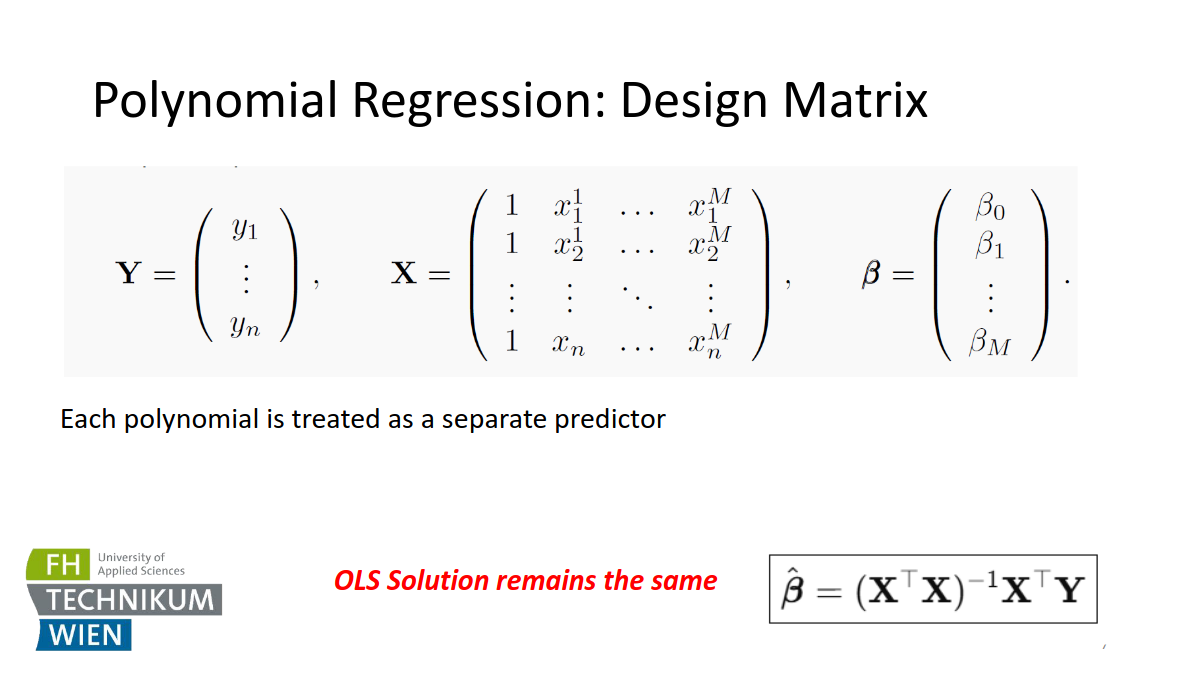


---

## 🧠 **Slide: Polynomial Regression — Design Matrix**

---

### 🔄 Quick Recap:

In regular multi-linear regression, each column in matrix $\mathbf{X}$ is a **different feature**:
e.g., TV, Radio, Newspaper

In **polynomial regression**, each column is a **transformed version of the same variable** $x$:

$$
x, x^2, x^3, ..., x^M
$$

---

### 📐 Matrix Breakdown:

---

#### ✅ Target Vector $\mathbf{Y}$

$$
\mathbf{Y} = \begin{pmatrix}
y_1 \\
\vdots \\
y_n
\end{pmatrix}
$$

Your observed values. Still the same.

---

#### ✅ Design Matrix $\mathbf{X}$

$$
\mathbf{X} = \begin{pmatrix}
1 & x_1^1 & x_1^2 & \cdots & x_1^M \\
1 & x_2^1 & x_2^2 & \cdots & x_2^M \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n^1 & x_n^2 & \cdots & x_n^M \\
\end{pmatrix}
$$

Each **row** is a data point.
Each **column** is a polynomial **basis** function:

* $x^0 = 1$ (intercept)
* $x^1 = x$
* $x^2 = x^2$
* up to $x^M$

So, the matrix has size: $n \times (M+1)$

---

#### ✅ Coefficient Vector $\boldsymbol{\beta}$

$$
\boldsymbol{\beta} = \begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_M
\end{pmatrix}
$$

Weights for each polynomial term — exactly like in linear regression.

---

### 🧠 Insight:

> We’ve **converted a non-linear problem into a linear algebra problem** — by expanding the input into polynomial terms and solving with the same OLS trick.

---

### ✅ Bottom Line:

The **OLS solution** formula remains unchanged:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
$$

Same engine, different input encoding.

---

### 💬 Summary:

> “Polynomial regression is just linear regression on an expanded feature space — each monomial is treated as if it were a separate feature.”

Super clever, super powerful.

---


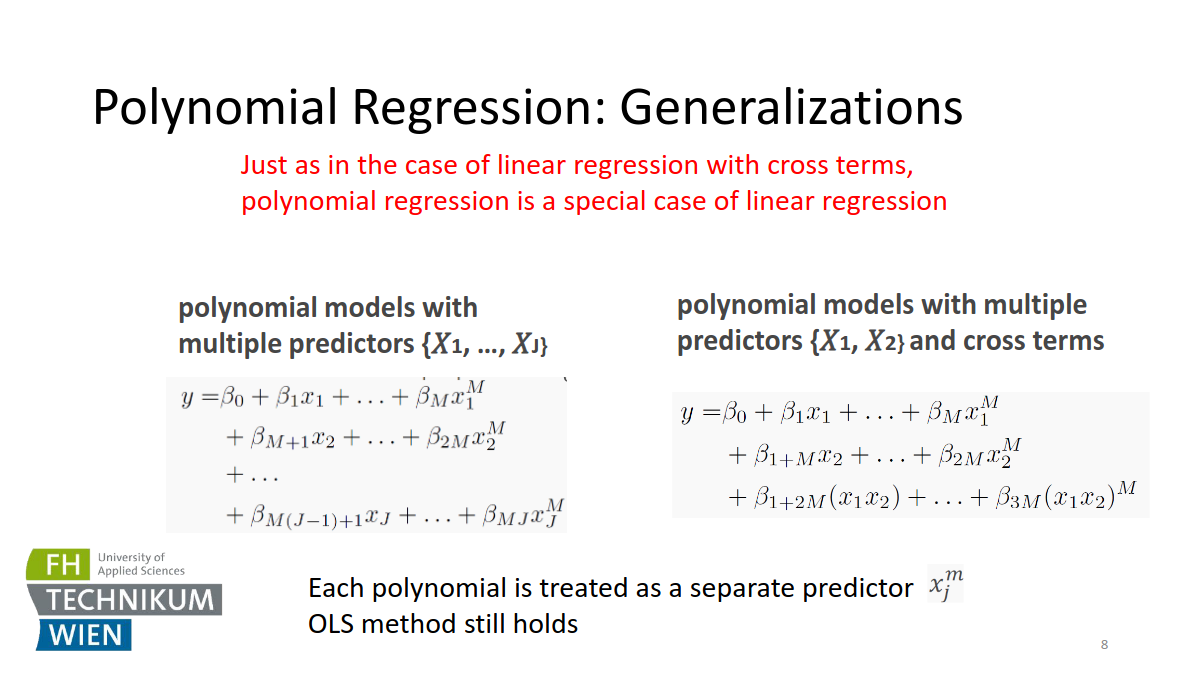


---

## 🧠 **Slide: Polynomial Regression – Generalizations**

---

### 🔁 Key Message (top in red):

> Polynomial regression is still just a **special case** of linear regression — even when we add **cross terms** or multiple variables!

Everything still boils down to a **linear combination of transformed features**.

---

### 🧱 Left Side: Multiple Predictors Without Cross Terms

Here we generalize polynomial regression to **multiple input features**, say:

$$
\{x_1, x_2, ..., x_J\}
$$

We expand each feature **independently** into its powers:

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_M x_1^M
\quad + \beta_{M+1} x_2 + \cdots + \beta_{2M} x_2^M
\quad + \cdots
\quad + \beta_{MJ} x_J^M
$$

Each polynomial feature $x_j^m$ is treated as a **separate column** in the design matrix.

✔️ This is called **additive polynomial regression**. Still no interaction between features.

---

### 🔄 Right Side: Multiple Predictors *With* Cross Terms

This is where we go next level — we include **combinations** of features:

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_{M} x_1^M + \beta_{M+1} x_2 + \cdots + \beta_{2M} x_2^M
\quad + \beta_{2M+1} (x_1 x_2) + \cdots + \beta_{3M} (x_1 x_2)^M
$$

These terms model **interactions between variables**, like:

* $(x_1 x_2)$
* $(x_1^2 x_2)$
* $(x_1 x_2^3)$

This lets the model capture **non-additive** effects — like "TV and Radio together have a different effect than the sum of each."

---

### 💡 Final Note (bottom):

> Each transformed polynomial expression — even cross terms like $x_1 x_2^2$ — is just another **column** in the design matrix.

✅ You can still solve the model with the **same OLS formula**.

---

### 🔥 Summary:

> Polynomial regression isn’t limited to single-variable curves. With cross terms, it becomes a **flexible, high-dimensional model** capable of capturing complex interactions.

Still **linear in the parameters**, so we can keep using all our linear algebra tools.

---


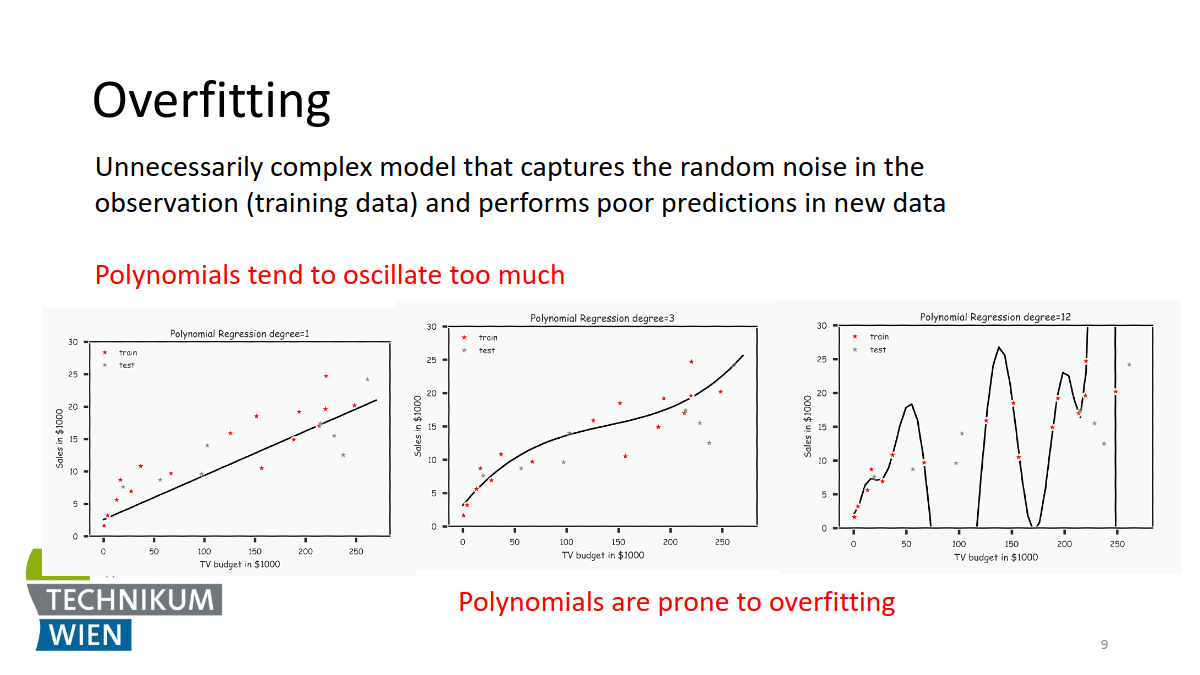


---

## 🧠 **Slide: Overfitting**

---

### ❓ What is Overfitting?

> It’s when your model fits the **training data too well** — including the **random noise** — and **fails to generalize** to new (test) data.

In plain terms:

* You're memorizing instead of learning.
* The model becomes **too complex** for the actual underlying pattern.

---

### 🚩 Visual Progression: Left to Right

---

#### 🔹 Left Plot – Degree 1 (Linear Regression)

* The model is **underfitting**: too simple.
* The line doesn’t capture the curve in the data.
* Prediction error is high — both for training and test sets.

---

#### 🔸 Middle Plot – Degree 3

* **Just right**: This curve fits the training data **well**, and still looks reasonable.
* It captures the general trend without going crazy.
* This is a good **bias-variance tradeoff**.

---

#### 🔺 Right Plot – Degree 12

* Disaster!
* The model twists and turns to fit every training point exactly.
* But it performs **terribly** on test data (gray points), because it's chasing noise.
* This is a textbook example of **overfitting**.

📉 Notice the spikes and dips? That’s polynomial **oscillation** — a common issue with high-degree models.

---

### 🔥 Key Takeaways (in red):

* **Polynomials tend to oscillate too much**.
* **They are prone to overfitting** — especially as you increase the degree.

---

### 🧠 General Rule:

> The more flexible your model, the more it can overfit.
> So, more complexity **isn’t always better**.

---

### 💊 Remedies?

* Use **cross-validation** to choose the degree.
* Use **regularization** (like Ridge or Lasso).
* Switch to **splines**, which we'll probably see next!

---


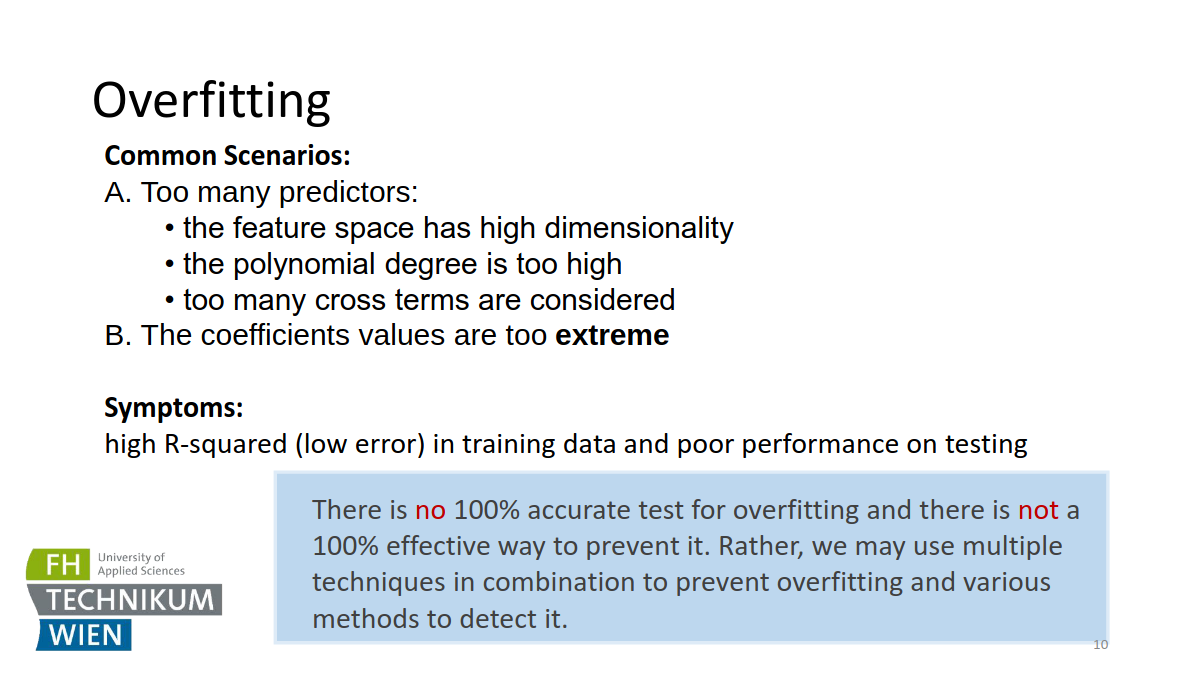


---

## 🔍 **Slide: Overfitting – Common Scenarios & Warnings**

---

### ⚠️ **A. Common Causes**

#### ✅ 1. Too Many Predictors:

* **High dimensionality**:
  You have **too many features** for the number of observations — your model can “memorize” rather than learn.

* **High-degree polynomials**:
  Going up to degree 10, 15, 20+ means adding *lots* of wiggly terms that fit noise.

* **Too many cross terms**:
  Combining features like $x_1x_2^2$, $x_2x_3^4$, etc. creates a **combinatorial explosion** of features.

💥 Together, these bloat the feature space and increase the risk of overfitting.

---

#### ✅ 2. Coefficients are Too **Extreme**:

* Overfitting often leads to **wildly large β-values**, because the model is stretching hard to “nail” all training points.
* This leads to poor generalization — the model is **brittle**.

---

### 🩺 **Symptoms of Overfitting**

* Very **high $R^2$** on training data (looks great!)
  BUT
* Terrible performance on unseen test data.

👉 High train accuracy ≠ good model
Always check on **unseen data!**

---

### 🧊 Reality Check (blue box):

> ❌ No single test
> ❌ No foolproof prevention

There is **no silver bullet**.

Instead, we use a combination of tools:

✅ **Cross-validation**
✅ **Regularization (L1/L2)**
✅ **Simpler models**
✅ **Feature selection or reduction**
✅ **Early stopping**

---

### 💬 Summary:

> Overfitting is the **silent killer** of model generalization. It often hides behind beautiful training accuracy — and explodes when faced with new data.

---


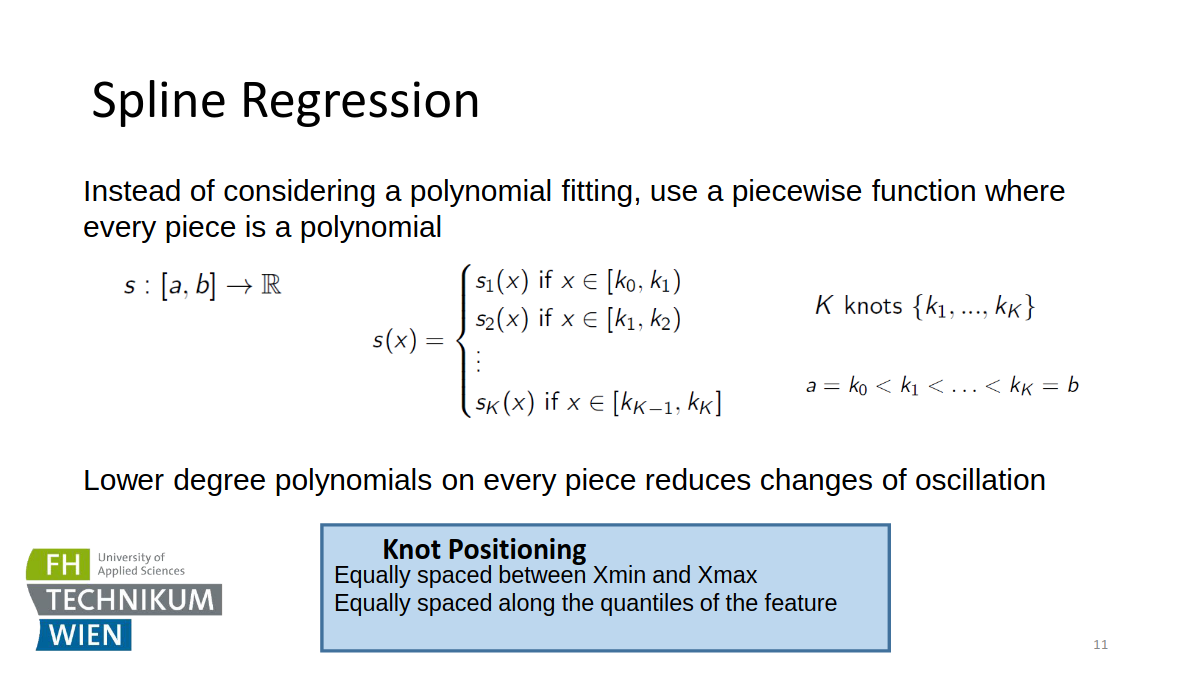


---

## 🧠 **Slide: Spline Regression**

---

### ❓ Motivation

> Instead of trying to force one big high-degree polynomial to fit the whole dataset, we **split the input range into smaller intervals** and fit **separate, lower-degree polynomials** in each one.

These pieces are smoothly connected — like fitting **multiple gentle curves** instead of one wild rollercoaster.

---

### 🧩 Mathematical Idea

You define a **function $s(x)$** that is:

$$
s(x) =
\begin{cases}
s_1(x), & x \in [k_0, k_1] \\
s_2(x), & x \in [k_1, k_2] \\
\vdots \\
s_K(x), & x \in [k_{K-1}, k_K]
\end{cases}
$$

Where:

* Each $s_i(x)$ is a **low-degree polynomial** (often linear or cubic).
* $k_0, ..., k_K$ are called **knots** — the points where you split the domain.
* You still define the function over the whole interval $[a, b]$, but in **pieces**.

---

### 🔑 Benefits of Splines

* **Avoids overfitting**: No need for degree 12 or 15; we use small-degree pieces.
* **Smooth**: We can ensure continuity — often even smoothness in the first or second derivative.
* **Flexible**: Can adapt shape locally without affecting the rest of the function.

---

### 📌 Knot Positioning (blue box)

Choosing where to place the knots is critical!

Two common strategies:

1. **Equally spaced between $x_\text{min}$ and $x_\text{max}$**
   Simple, uniform splitting.

2. **Equally spaced quantiles of the feature**
   More robust — especially when data is not evenly distributed (i.e. skewed data).

This helps balance flexibility across dense and sparse regions.

---

### 🔬 Summary

> Splines model complex relationships by combining **local simplicity** with **global flexibility** — a smooth curve made of simple segments.

They are **a much more stable alternative** to high-degree polynomial regression.

---


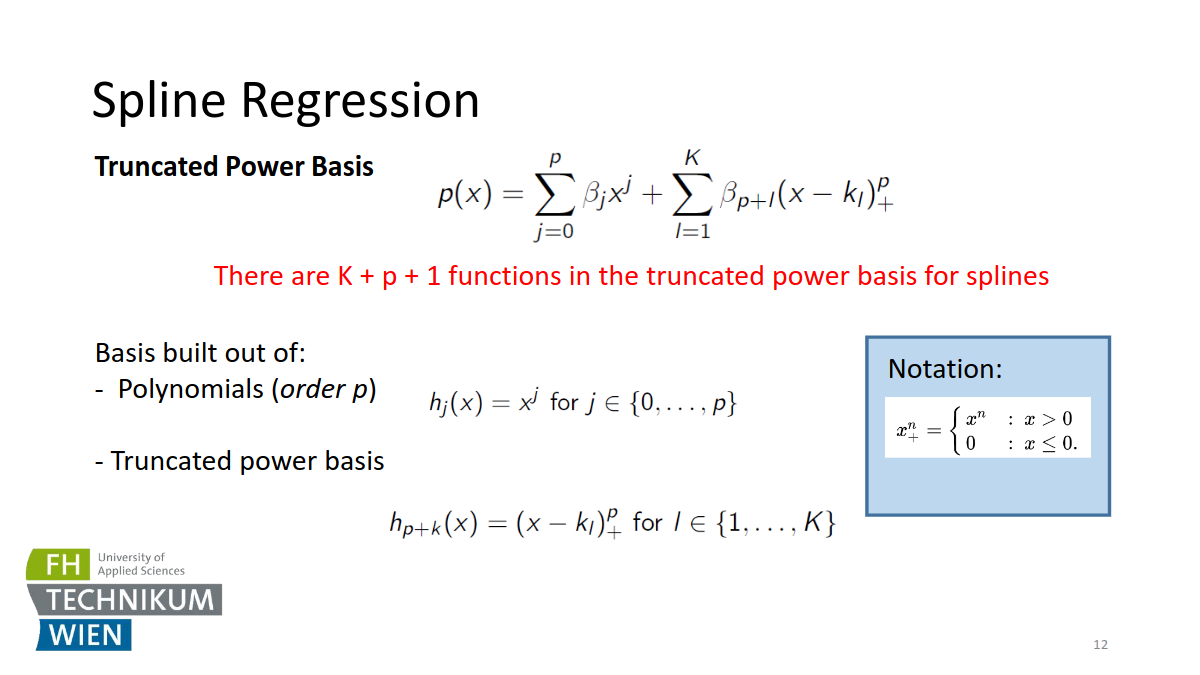


---

## 🧠 **Slide: Spline Regression – Truncated Power Basis**

---

### 🧱 The Main Formula

$$
p(x) = \sum_{j=0}^{p} \beta_j x^j + \sum_{l=1}^{K} \beta_{p+l} (x - k_l)_+^p
$$

This defines a **spline of degree $p$** with **$K$** **knots**.

Let's break it down:

---

### 🔹 First Sum: Regular Polynomial

$$
\sum_{j=0}^{p} \beta_j x^j
$$

* Standard monomials: $1, x, x^2, ..., x^p$
* Global polynomial terms — just like before.

---

### 🔸 Second Sum: **Truncated Power Functions**

$$
\sum_{l=1}^{K} \beta_{p+l} (x - k_l)^p_+
$$

* These are **new basis functions added at each knot $k_l$**.
* Each one activates **only after** its knot.

#### 🔹 What is $(x - k)^p_+$ ?

* Defined as:

$$
(x - k)^p_+ =
\begin{cases}
(x - k)^p & \text{if } x > k \\
0 & \text{if } x \leq k
\end{cases}
$$

Think of it as: "turn on a new curve starting at $k$", and **leave everything before that untouched**.

This **piecewise behavior** is the magic of splines.

---

### 🧮 Total Number of Basis Functions:

$$
\text{# basis functions} = p + 1 + K
$$

* $p + 1$ = number of polynomial terms (from $x^0$ to $x^p$)
* $K$ = number of knots → each gives one truncated term.

So for cubic splines ($p = 3$) with 4 knots, you get:

$$
3 + 1 + 4 = 8\ \text{basis functions}
$$

---

### 🧩 Basis Breakdown (bottom left):

1. **Polynomial basis**:

   $$
   h_j(x) = x^j,\quad j = 0, 1, ..., p
   $$

2. **Truncated power basis**:

   $$
   h_{p+k}(x) = (x - k_l)^p_+,\quad k = 1, ..., K
   $$

These combined define the **spline space** you’ll be fitting with OLS or other methods.

---

### 🧠 Summary:

> A spline is just a **linear model** with **smart basis functions**:
>
> * Polynomials up to degree $p$
> * Plus truncated powers at knots, to allow local flexibility.

This structure allows smooth transitions between segments — without wild oscillation like high-degree polynomials.

---


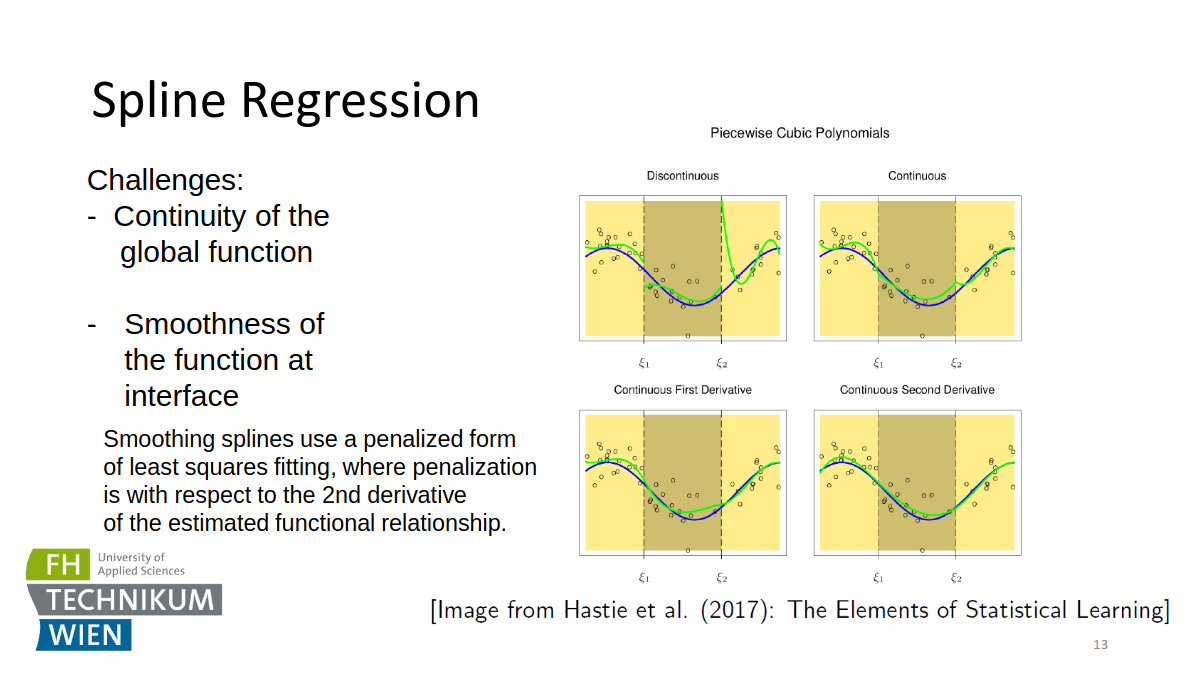


---

## 🧠 **Slide: Spline Regression – Continuity & Smoothness**

---

### 🧩 The Big Challenge:

> We're combining different polynomials over different intervals.
> But we don’t want a jarring, zigzag mess at the transition points.

So we ask:

1. **Is the function continuous at the knots?**
2. **Are its derivatives smooth at the knots?**

This is what makes a spline **visually and statistically elegant**.

---

### 🔍 Four Plots on the Right: "Piecewise Cubic Polynomials"

Let’s interpret these 👇

---

#### 🔴 Top Left: **Discontinuous**

* The pieces don’t match at all — abrupt jumps.
* Like gluing together separate regressions.
* This is **not a spline**. Just piecewise junk.

---

#### 🟠 Top Right: **Continuous**

* The value of the function is the same at the boundaries.
* But slope changes abruptly — **corners appear**.
* Mathematically: function is **C⁰ continuous** (function is continuous).

---

#### 🟢 Bottom Left: **Continuous First Derivative**

* Smoother transitions — no sharp corners.
* Derivative doesn’t jump.
* Function is now **C¹ continuous** — both the function and its **first derivative** are continuous.

---

#### 🔵 Bottom Right: **Continuous Second Derivative**

* Even curvature flows smoothly.
* Function is **C² continuous** — value, slope, and curvature are all smooth.

✅ This is the gold standard in splines, especially **cubic splines**. This is what you want.

---

### 📏 Smoothing Splines: Add Regularization

> "Smoothing splines use a penalized form of least squares fitting..."

In other words:

* We **minimize** the fit error **plus** a penalty on how “wiggly” the spline is.
* That penalty is based on the **second derivative** (curvature):

$$
\text{Penalty} \propto \int (s''(x))^2 dx
$$

This encourages **smoothness**, while still letting the spline adapt to the data.

---

### 💬 Summary:

> Splines aren’t just stitched polynomials — they are **carefully engineered** to be smooth, flexible, and regularized.

And that’s why they often outperform both:

* High-degree polynomials (which oscillate too much), and
* Rigid linear models (which can’t bend enough).

---


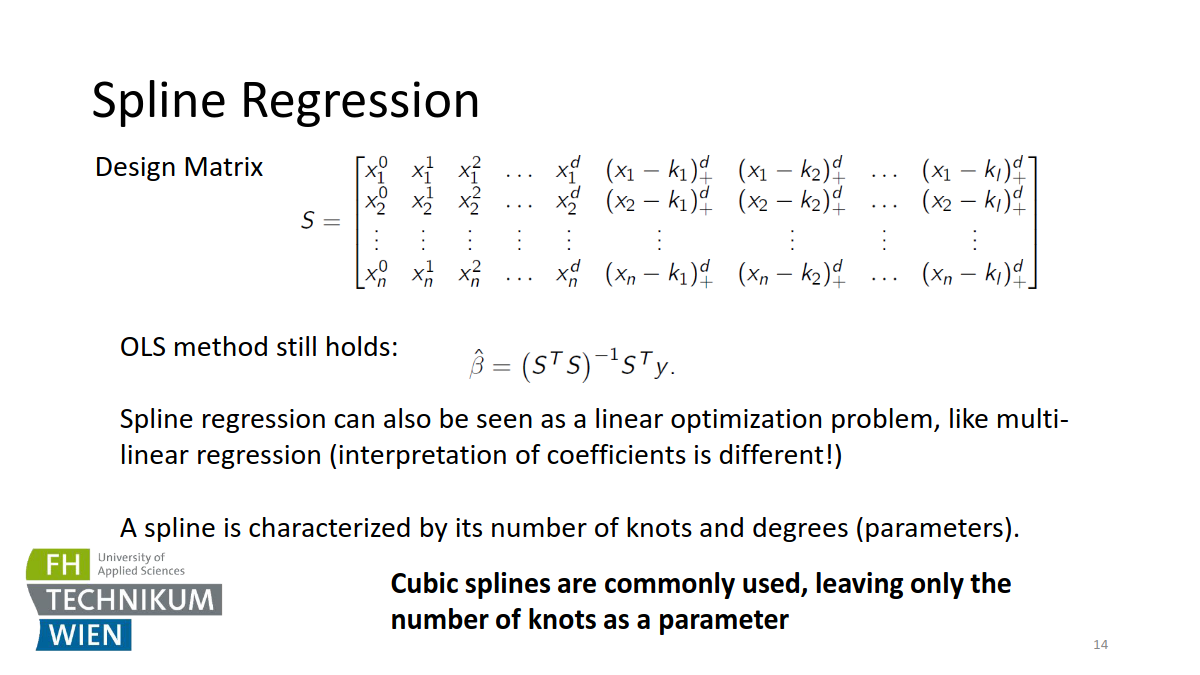


---

## 🧠 **Slide: Spline Regression – Design Matrix & OLS**

---

### 📐 What You’re Seeing:

This is the **design matrix $S$** for spline regression, just like $\mathbf{X}$ in multi-linear regression.

---

### 🔍 Matrix Structure:

$$
S =
\begin{bmatrix}
x_1^0 & x_1^1 & x_1^2 & \cdots & x_1^d & (x_1 - k_1)^d_+ & (x_1 - k_2)^d_+ & \cdots & (x_1 - k_K)^d_+ \\
x_2^0 & x_2^1 & x_2^2 & \cdots & x_2^d & (x_2 - k_1)^d_+ & (x_2 - k_2)^d_+ & \cdots & (x_2 - k_K)^d_+ \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \ddots & \vdots \\
x_n^0 & x_n^1 & x_n^2 & \cdots & x_n^d & (x_n - k_1)^d_+ & (x_n - k_2)^d_+ & \cdots & (x_n - k_K)^d_+
\end{bmatrix}
$$

Each row corresponds to a data point.
Each column corresponds to one basis function:

* Monomials up to degree $d$
* Plus the **truncated power functions** at the $K$ knots

---

### 💡 Recap of Truncated Power:

$$
(x - k)^d_+ = \begin{cases}
(x - k)^d & \text{if } x > k \\
0 & \text{if } x \leq k
\end{cases}
$$

These make the spline flexible **after each knot**, without touching earlier segments.

---

### 🧮 OLS Formula Still Works!

$$
\hat{\boldsymbol{\beta}} = (S^\top S)^{-1} S^\top \mathbf{Y}
$$

✅ Same principle as in linear regression
✅ Solves for the best-fitting coefficients for all basis functions
✅ Simple matrix math — but applied to a more **sophisticated feature space**

---

### 🔁 Interpretation:

> Although we’re solving the same **OLS system**, the **meaning of the coefficients is different**:

* In linear regression, β is the slope of a feature.
* In splines, β controls the **shape** of each segment or **bending** at a knot.

So spline regression **is still a linear model** in terms of computation, but a **nonlinear model** in terms of input–output behavior.

---

### 🎯 Final Notes:

* A spline is **defined** by:

  * its **degree** (often fixed to 3 for **cubic splines**),
  * and the **number of knots** (tunable).

> That’s why “**Cubic splines are commonly used**, leaving only the number of knots as a parameter.”

✔️ Easy to interpret
✔️ Easy to control complexity
✔️ No wild oscillations

---

### 🧠 Summary:

> **Spline regression = Linear regression with smart, localized basis functions.**
> It’s as powerful as it is elegant.

---


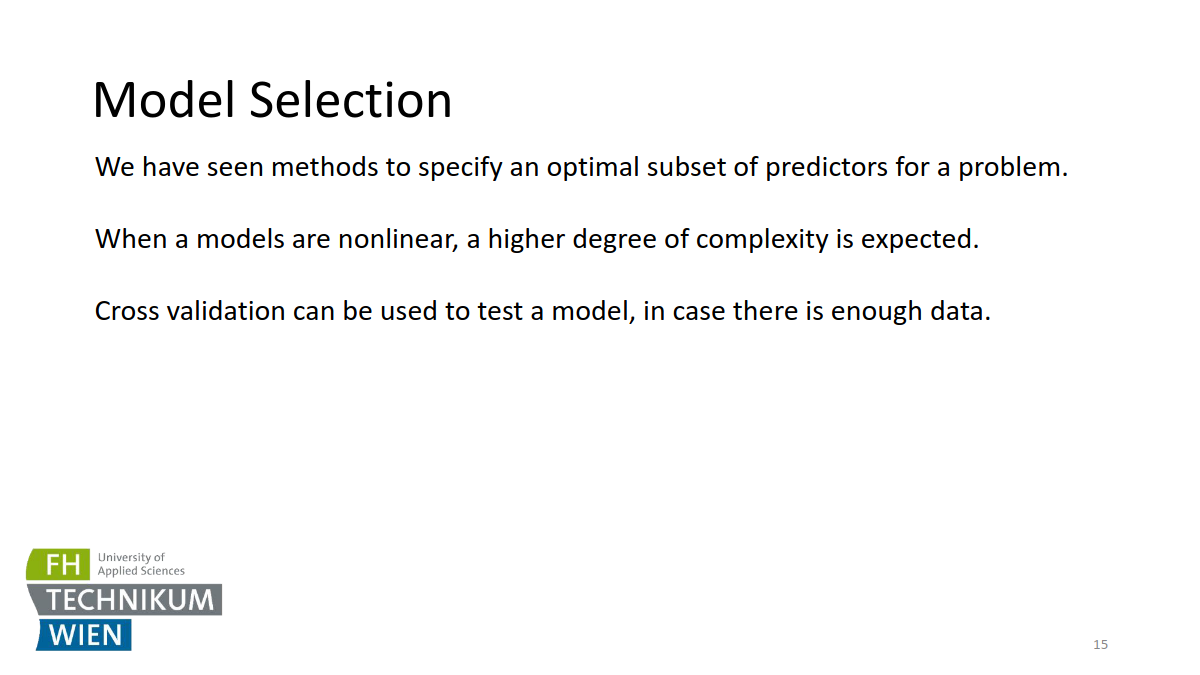


---

## 🧠 **Slide: Model Selection**

---

### 🧩 What This Slide Is Telling Us

We now have **many possible models** to choose from:

* Linear regression
* Polynomial regression (with varying degrees and cross terms)
* Splines (with varying knots and degrees)

But **which one is best?**
That’s where **model selection** comes in.

---

### ✅ Step-by-Step Key Ideas:

---

#### 1. **Subset Selection (Feature Selection)**

> "We have seen methods to specify an optimal subset of predictors"

✔️ In multi-linear regression, we can:

* Drop irrelevant or redundant features
* Use stepwise selection (forward/backward)
* Apply Lasso or other regularization to shrink coefficients

This prevents **overfitting** and improves **interpretability**.

---

#### 2. **Nonlinear Models Add Complexity**

> “When models are nonlinear, a higher degree of complexity is expected.”

* In polynomial regression, higher degrees = more risk.
* In splines, more knots = more flexibility (and danger).
* Nonlinear models often require **more careful tuning** to avoid overfitting.

---

#### 3. **Cross-Validation for Evaluation**

> “Cross-validation can be used to test a model…”

✅ Yes! One of the most important tools in your ML toolbox:

* Split the data into **training** and **validation** folds.
* Try multiple model types (e.g. linear vs. poly vs. spline).
* Choose the one that **generalizes best** (lowest validation error).

Especially important when:

* You have **enough data** to hold some back
* You’re trying **multiple degrees or configurations**

---

### 💡 Final Insight:

> Model selection is not just about training accuracy — it’s about **balancing complexity and generalization**.

That’s why we combine:

* **Regularization** (to shrink unnecessary terms),
* **Feature/term selection** (to simplify),
* And **cross-validation** (to test robustness).

---



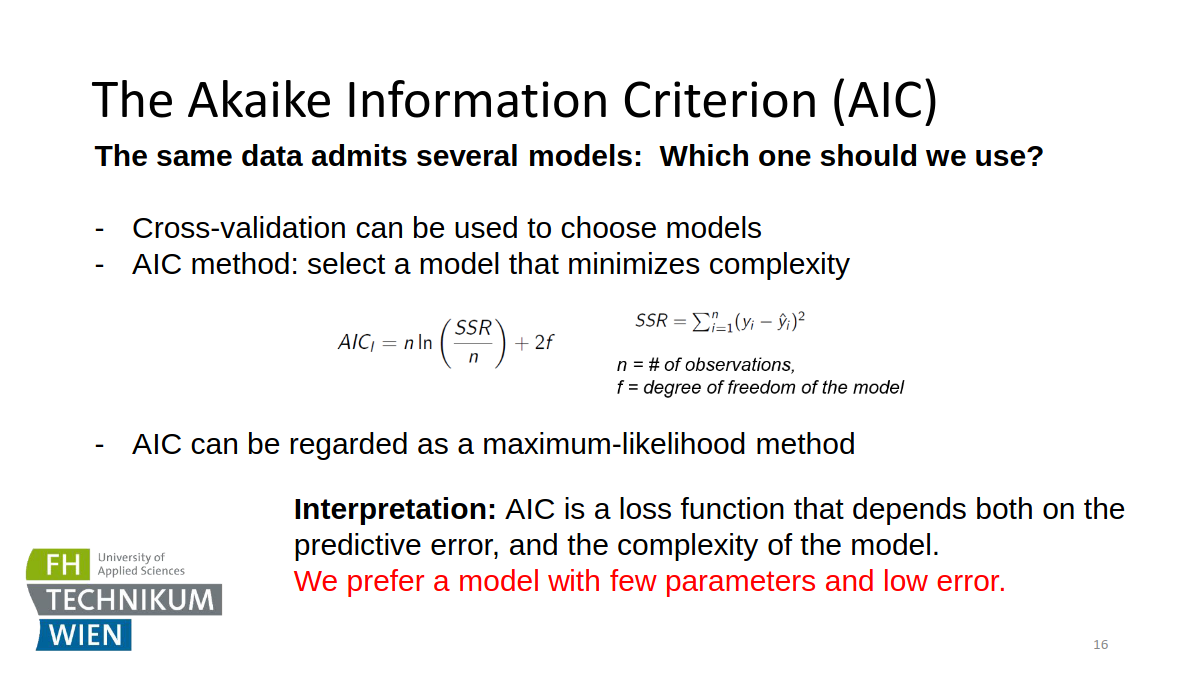


---

## 🧠 **Slide: The Akaike Information Criterion (AIC)**

---

### ❓ The Core Question:

> "The same data admits several models — which one should we use?"

That’s the **model selection** challenge in a nutshell.

---

### ✅ Cross-Validation (first bullet)

As you’ve seen, **cross-validation** estimates **generalization error**.
But it can be **computationally expensive** (especially with big models or big data).

So we sometimes use **AIC** as a faster alternative grounded in **information theory** and **likelihood estimation**.

---

## 📐 The AIC Formula:

$$
AIC = n \cdot \ln\left( \frac{SSR}{n} \right) + 2f
$$

Where:

* $SSR = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ = **Sum of Squared Residuals**
* $n$ = number of observations
* $f$ = number of free parameters in the model (i.e. **degrees of freedom**)

---

### 🔎 Interpretation:

* The first term, $n \cdot \ln(SSR/n)$, rewards **fit quality** (lower error = better).
* The second term, $2f$, **penalizes complexity** (more parameters = worse).

💡 **Tradeoff**: AIC balances between:

* **Goodness of fit**
* **Model simplicity**

---

### 💬 Final Key Message (bottom):

> **“We prefer a model with few parameters and low error.”**

✔️ Lower AIC = better model
✔️ It’s not about accuracy alone — it’s about being efficient in explaining the data.

---

### 🧠 Pro Insight:

* AIC is an **approximation of out-of-sample deviance**.
* It comes from **maximum likelihood theory**, assuming normally-distributed errors.
* Use **AIC** when comparing models **fitted to the same dataset**.

---

### 🧮 Example:

Suppose:

* Linear model: SSR = 1000, f = 3
* Cubic spline: SSR = 700, f = 10

Then even if the spline has lower error, the higher $f$ might make the **AIC larger** — so you might still prefer the linear model depending on the tradeoff.

---

## 🎓 Final Summary

> AIC is a **quantitative way to choose the “sweet spot”**: a model that’s not too simple, not too complex — **just right**.

---


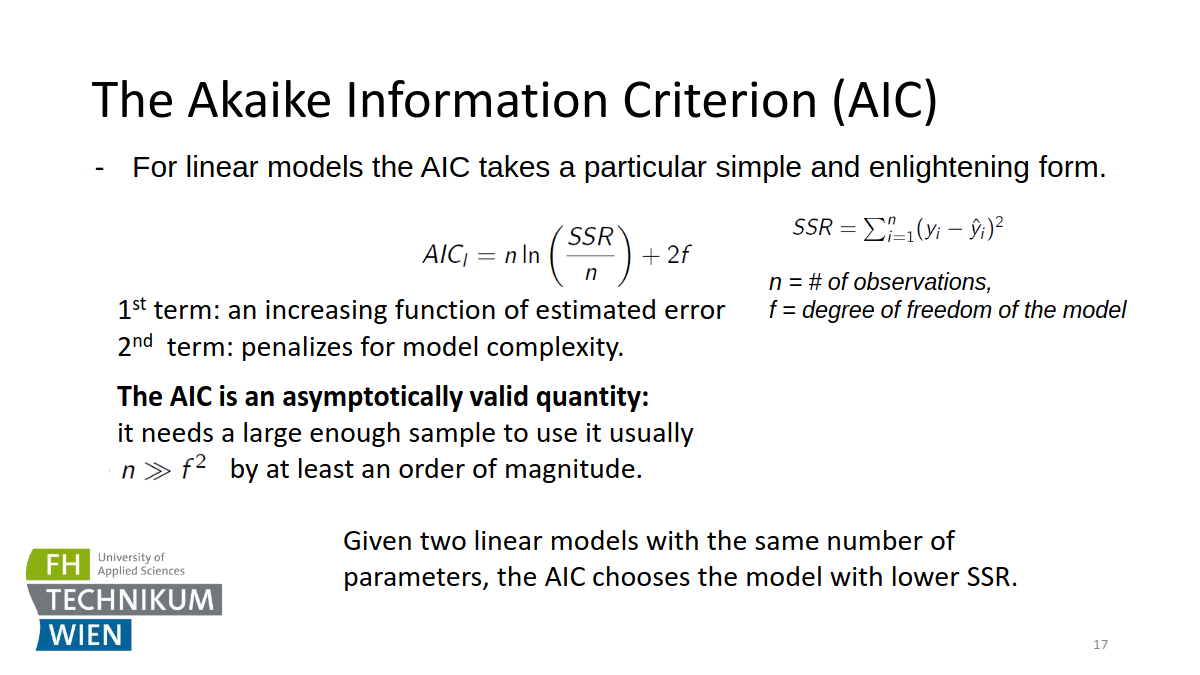


---

## 🧠 **Slide: The Akaike Information Criterion (AIC) — Linear Case**

---

### 🔍 Core Formula (Again):

$$
AIC = n \cdot \ln\left(\frac{SSR}{n}\right) + 2f
$$

* $n$: Number of observations
* $f$: Degrees of freedom = Number of parameters
* $SSR = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$: Sum of squared residuals

---

### 🔢 Components:

---

#### ✅ **1st Term**:

$$
n \cdot \ln\left(\frac{SSR}{n}\right)
$$

📈 This term **increases with model error**.
The higher the prediction error (residuals), the worse this term becomes.

---

#### ✅ **2nd Term**:

$$
+ 2f
$$

📉 This is the **penalty for complexity**.
More parameters = more flexibility = higher risk of overfitting = bigger penalty.

---

### 📘 Important Theoretical Note:

> **“The AIC is an asymptotically valid quantity”**

🔍 What does that mean?

* It's **statistically sound** when the **sample size is large**.
* Specifically, it works best when:

$$
n \gg f^2
$$

For example: if your model has 10 parameters, ideally you’d want **at least 100 data points**. Otherwise, AIC becomes **unreliable**.

---

### 🧠 Final Takeaway (bottom of slide):

> **"Given two linear models with the same number of parameters, the AIC chooses the model with lower SSR."**

Makes sense! If the penalty term is equal (same $f$), AIC reduces to comparing **error terms only** — and favors the **more accurate model**.

---

## 🎯 Summary:

> For linear models, AIC offers a **fast, interpretable, and statistically grounded** method to choose between models — balancing **fit** and **parsimony**.

✔️ Valid under large sample assumptions
✔️ Favors models with **less error and fewer parameters**
✔️ Especially useful when **CV is too costly**

---


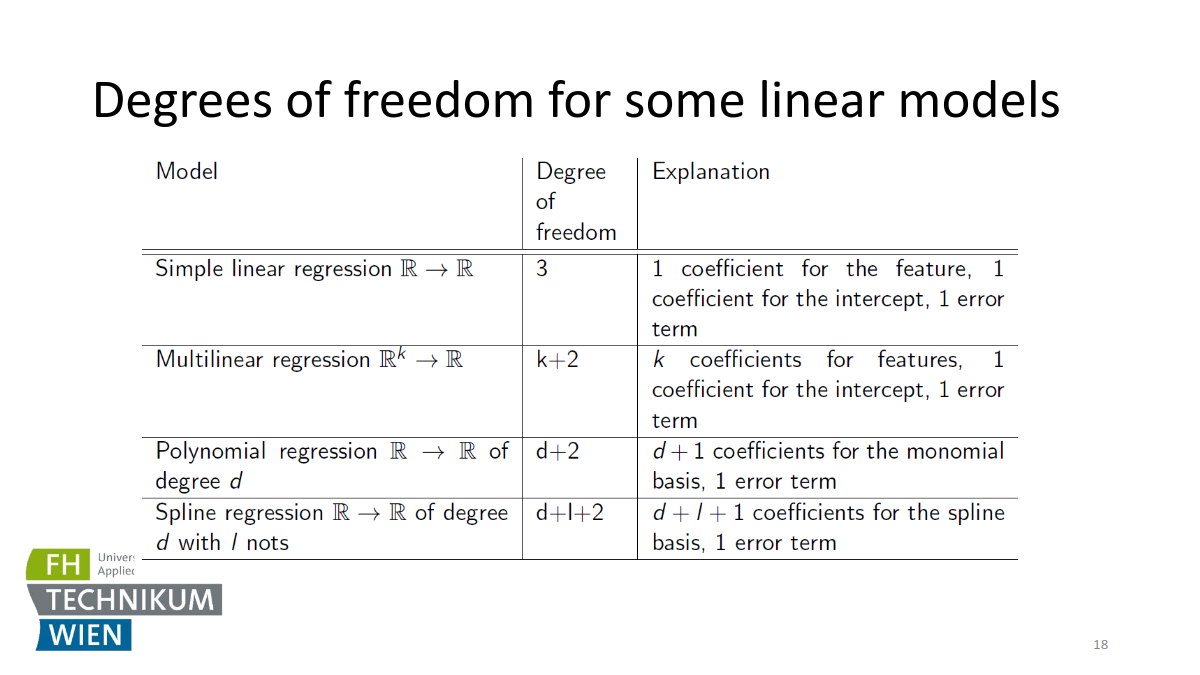


---

## 🧠 **Slide: Degrees of Freedom for Some Linear Models**

Let’s walk through each row and make sure the logic is crystal clear.

---

### 📏 **1. Simple Linear Regression $\mathbb{R} \to \mathbb{R}$**

* **Degree of freedom**: $3$
* ✅ 1 for the slope ($\beta_1$)
* ✅ 1 for the intercept ($\beta_0$)
* ✅ 1 for the error variance term

---

### 📏 **2. Multilinear Regression $\mathbb{R}^k \to \mathbb{R}$**

* **Degree of freedom**: $k + 2$
* ✅ $k$ for the predictors
* ✅ 1 for the intercept
* ✅ 1 for the error term

🧠 This grows with the number of predictors → bigger models → more penalty in AIC.

---

### 📏 **3. Polynomial Regression $\mathbb{R} \to \mathbb{R}$, degree $d$**

* **Degree of freedom**: $d + 2$
* ✅ $d + 1$ coefficients for powers of $x^0, x^1, ..., x^d$
* ✅ 1 error term

Even though it’s “1D”, the model gets complex as $d$ increases.

---

### 📏 **4. Spline Regression $\mathbb{R} \to \mathbb{R}$, degree $d$, with $l$ knots**

* **Degree of freedom**: $d + l + 2$
* ✅ $d + 1$ for polynomial basis
* ✅ $l$ for truncated powers from knots
* ✅ 1 error term

✔️ Cubic splines ($d = 3$) with 4 knots → $3 + 1 + 4 + 1 = 9$ degrees of freedom

---

### 🔑 Why Does This Matter?

Because in **AIC**, we use:

$$
AIC = n \cdot \ln\left(\frac{SSR}{n}\right) + 2f
$$

So knowing **$f$** is key to:

* Comparing models
* Understanding trade-offs between flexibility and generalization

---

### 🧠 Final Summary

> Degrees of freedom tell you how many “levers” your model has.
> More degrees = more flexibility, but also more risk of overfitting.

Use this table to plug in the right $f$ when calculating AIC, or when regularizing models.

---

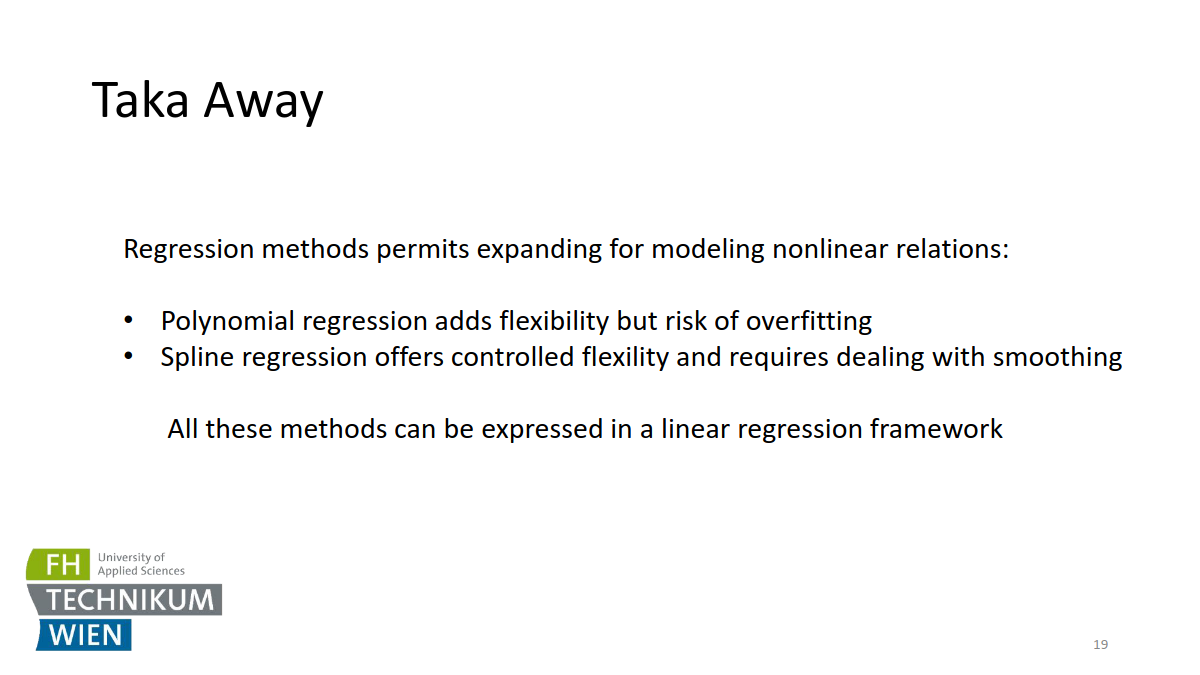


---

## 🧠 **Slide: Takeaway**

This slide distills the core ideas from the lecture:

---

### 🔹 Regression Expands to Nonlinearity

> “Regression methods permit expanding for modeling nonlinear relations”

Exactly! Classic linear regression isn’t enough when the relationship between input and output bends, curves, or twists.

That’s where **polynomials and splines** enter the game.

---

### 🔸 Polynomial Regression

> “Adds flexibility but risk of overfitting”

✅ You add powers like $x^2, x^3, ..., x^d$ to make the model bend.

🚨 But it gets unstable with high degrees — overfitting, wild oscillations, poor generalization.

---

### 🔸 Spline Regression

> “Offers controlled flexibility and requires dealing with smoothing”

✅ Splines use **piecewise low-degree polynomials**.
They’re **local** and more stable.

🧩 But you must:

* Choose **knot positions**
* Possibly **penalize wiggliness** (e.g. smoothing splines)

---

### 🧠 Universal Point:

> “All these methods can be expressed in a linear regression framework”

💡 **This is the master insight.** Even polynomial and spline regression are just **linear models in transformed input space**.

That means:

* Same OLS solution applies
* Same interpretability (in terms of basis functions)
* Same tools (AIC, CV, regularization)

---

### 🎓 Final Summary

* 📈 Polynomial regression: simple, flexible, prone to overfitting
* 🧵 Spline regression: smooth, local, scalable
* ⚙️ All can be solved with **linear regression techniques**
* 📊 Use **cross-validation** or **AIC** for model selection

---